In [1]:
# you might need these, I'll update the docker image soon!
! pip install geopandas basemap folium

In [1]:
from ipywidgets import FloatProgress, Layout
from IPython.display import display
from micasense import imageset as imageset
from micasense import capture as capture
import multiprocessing
import glob, shutil, os

import cv2
import numpy as np
import matplotlib.pyplot as plt


import micasense.imageutils as imageutils
import micasense.plotutils as plotutils

import exiftool
import datetime

import subprocess
import math

from utils2 import *
# from georeg import *

import random
import cameratransform as ct
from rasterio.merge import merge



/usr/local/envs/micasense/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# this isn't really good practice but there are a few deprecated tools in the Micasense stack so we'll ignore some of these warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#project_path = os.path.join('../../../', 'lake_dataset')
project_path = os.path.join('../../../', 'estuarine_dataset')

project_path

'../../../estuarine_dataset'

### Raw -> Lt -> Lw (Black pixel method) -> Rrs (DLS) w/o pixel masking

In [8]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_blackpixel', output_csv_path=project_path, lw_method='blackpixel_method', 
                   mask_pixels=False, ed_method='dls_ed', overwrite=True, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 4
Finished aligning band 1
Finished aligning band 2
Finished aligning band 3


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:27.048226
Alignment+Saving rate: 0.59 images per second
Finished saving images.
Finished saving image metadata.
Converting raw sky images to radiance (raw sky -> Lsky).
Loading ImageSet from: ../../../estuarine_dataset/raw_sky_imgs
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 4
Finished aligning band 1
Finished aligning band 2
Finished aligning band 3


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:02.663023
Alignment+Saving rate: 0.75 images per second
Finished saving images.
Finished saving image metadata.
Applying the blackpixel_method (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the blackpixel_method to calcualte Lw and normalized by dls_ed irradiance.
Not masking pixels.


True

### Raw -> Lt -> Lw (Mobley method) -> Rrs (DLS) w/o pixel masking

In [14]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_mobley', output_csv_path=project_path, lw_method='mobley_rho_method', 
                   mask_pixels=False, ed_method='dls_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 3
Finished aligning band 1
Finished aligning band 4
Finished aligning band 2
Saving time: 0:00:00.018882
Alignment+Saving rate: 847.37 images per second
Finished saving images.
Finished saving image metadata.
Converting raw sky images to radiance (raw sky -> Lsky).
Loading ImageSet from: ../../../estuarine_dataset/raw_sky_imgs


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3
Finished aligning band 2


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.002127
Alignment+Saving rate: 940.29 images per second
Finished saving images.
Finished saving image metadata.
Applying the mobley_rho_method (Lt -> Lw).
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the mobley_rho_method to calcualte Lw and normalized by dls_ed irradiance.
Not masking pixels.


True

### Raw -> Lt -> Lw (Hedley method) -> Rrs (DLS) w/o pixel masking

In [16]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=15,
                   mask_pixels=False,ed_method='dls_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 3
Finished aligning band 1
Finished aligning band 4
Finished aligning band 2


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.013660
Alignment+Saving rate: 1171.30 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_ed irradiance.
Not masking pixels.


True

### Raw -> Lt -> Lw (Hedley method) -> Rrs (panel) 
#### running without overwriting previous data in order to get panel Ed

In [17]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=15,
                   mask_pixels=False, ed_method='panel_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 3
Finished aligning band 1
Finished aligning band 4


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.017132
Alignment+Saving rate: 933.92 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/panel
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by panel_ed irradiance.
Not masking pixels.


True

### Take a look at Rrs images to determine pixel masking

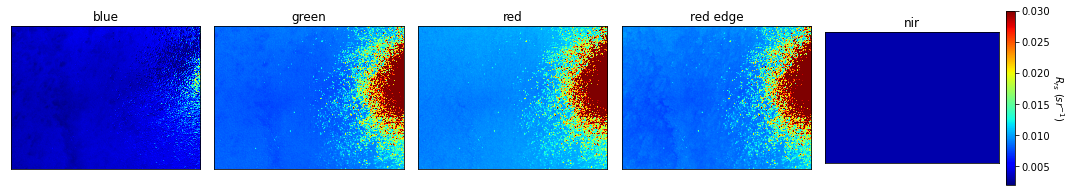

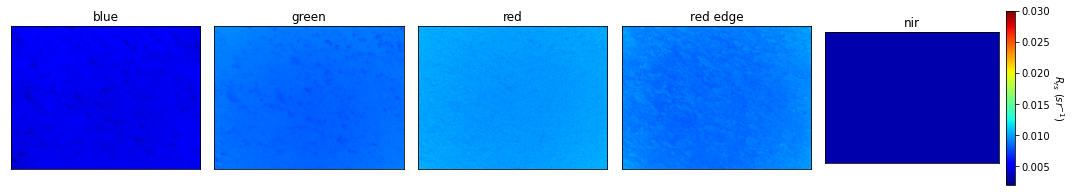

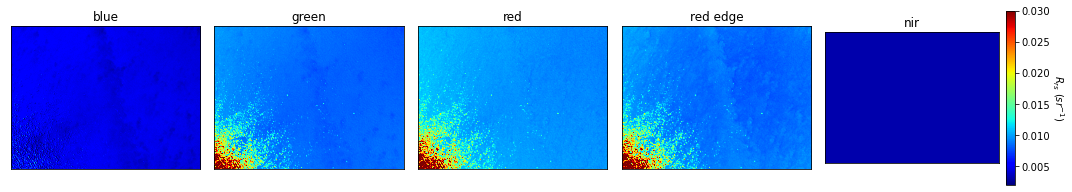

In [20]:
rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_hedley')

band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(rrs_imgs_hedley))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(rrs_imgs_hedley[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    cbar = fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

### Raw -> Lt -> Lw (Black pixel method) -> Rrs (DLS) w/ pixel masking (using thresholds)

In [25]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', 
                   mask_pixels=True, pixel_masking_method='value_threshold', nir_threshold=0.01, green_threshold=0.005,
                   ed_method='dls_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.019370
Alignment+Saving rate: 826.02 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_ed irradiance.
Masking pixels using NIR and green Rrs thresholds


True

### Read in data

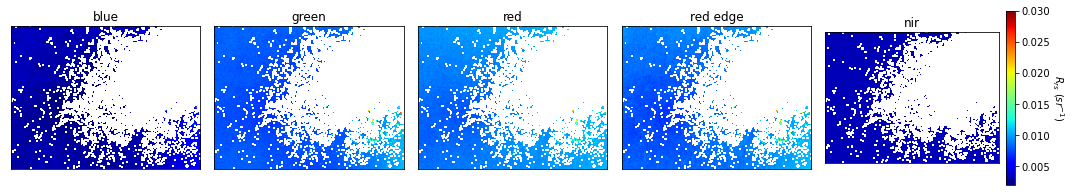

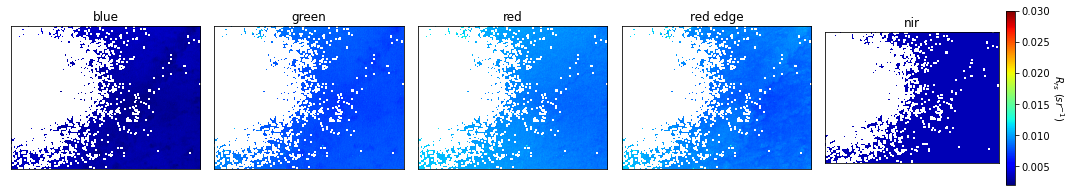

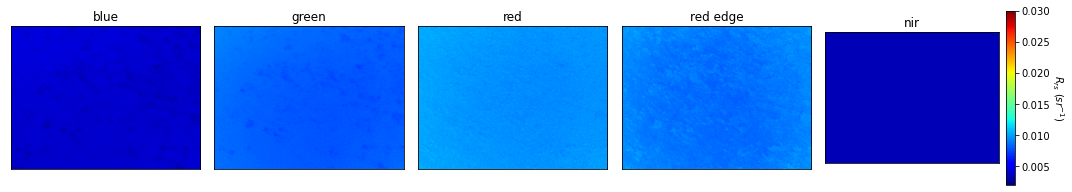

In [26]:
masked_rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')

band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(masked_rrs_imgs_hedley))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(masked_rrs_imgs_hedley[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    cbar = fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

In [27]:
lt_imgs, lt_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lt_imgs')
lsky_imgs, lsky_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/sky_lt_imgs', sky=True)

lw_imgs, lw_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lw_imgs')

dls_ed = pd.read_csv(project_path+'/dls_ed.csv') 
panel_ed = pd.read_csv(project_path+'/panel_ed.csv') 

rrs_imgs_blackpixel, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_blackpixel')
rrs_imgs_mobley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_mobley')
rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_hedley')
masked_rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')


### View metadata 
#### Metadata is the same for each processed dataset

In [28]:
lt_img_metadata.head()

,SourceFile,GPSDateStamp,GPSTimeStamp,GPSLatitude,GPSLatitudeRef,GPSLongitude,GPSLongitudeRef,GPSAltitude,FocalLength,ImageWidth,ImageHeight,GPSImgDirection,GPSPitch,GPSRoll,UTC-Time
filename,,,,,,,,,,,,,,,
capture_1.tif,../../../estuarine_dataset/capture_1.tif,2020:10:01,16:02:35,38.696491,N,-75.980171,W,86.475,5.43432,1280,960,-80.106253,-9.188963,10.370811,2022-12-12 16:02:35
capture_2.tif,../../../estuarine_dataset/capture_2.tif,2020:10:01,16:02:37,38.696613,N,-75.980126,W,85.809,5.43432,1280,960,-82.177910,-9.127214,-1.462324,2022-12-12 16:02:37
capture_3.tif,../../../estuarine_dataset/capture_3.tif,2020:10:01,16:02:39,38.696701,N,-75.980083,W,85.449,5.43432,1280,960,-82.925024,-10.330954,5.292332,2022-12-12 16:02:39
capture_4.tif,../../../estuarine_dataset/capture_4.tif,2020:10:01,16:02:41,38.696770,N,-75.980051,W,85.274,5.43432,1280,960,-83.344727,-8.729560,3.584024,2022-12-12 16:02:41
capture_5.tif,../../../estuarine_dataset/capture_5.tif,2020:10:01,16:02:43,38.696848,N,-75.980018,W,85.312,5.43432,1280,960,-83.760578,-6.986038,5.224941,2022-12-12 16:02:43


### Plot altitude and lat, lon

Text(0.5, 0, 'Longitude')

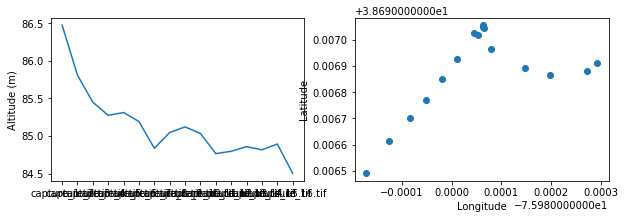

In [29]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].plot(lt_img_metadata['    GPSAltitude'])
ax[0].set_ylabel('Altitude (m)')

ax[1].scatter(lt_img_metadata['    GPSLongitude'], lt_img_metadata['    GPSLatitude'])
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')

### Plot all spectra

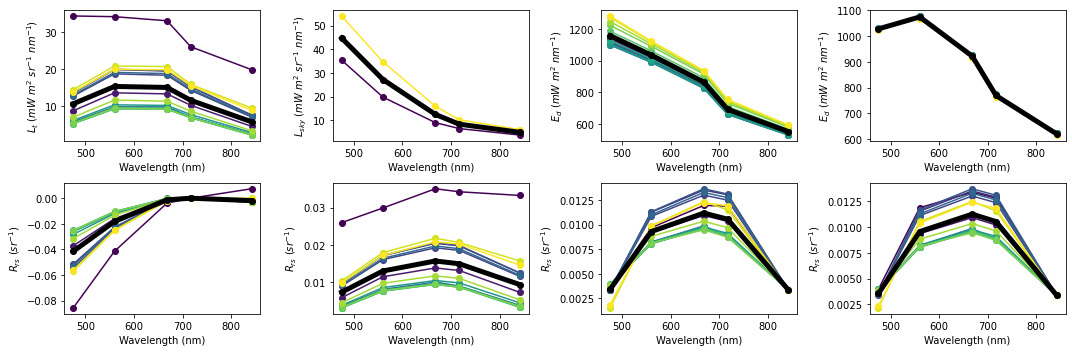

In [31]:
fig, ax = plt.subplots(2,4, figsize=(15,5))

wv = [475, 560, 668, 717, 842]
colors = plt.cm.viridis(np.linspace(0,1,len(lt_imgs)))

#lt
for i in range(len(lt_imgs)):
    ax[0,0].plot(wv, np.nanmean(lt_imgs[i,0:5,:,:],axis=(1,2))*1000,  marker = 'o', color=colors[i], label="")
    ax[0,0].set_xlabel('Wavelength (nm)')
    ax[0,0].set_ylabel('$L_t\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')   
ax[0,0].plot(wv, np.nanmean(lt_imgs[:,0:5,:,:], axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#lsky
colors = plt.cm.viridis(np.linspace(0,1,len(lsky_imgs)))

for i in range(len(lsky_imgs)):
    ax[0,1].plot(wv, lsky_imgs[i,0:5,:,:].mean(axis=(1,2))*1000,  marker = 'o', color=colors[i], label="")
    ax[0,1].set_xlabel('Wavelength (nm)')
    ax[0,1].set_ylabel('$L_{sky}\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')    
ax[0,1].plot(wv, np.nanmean(lsky_imgs[:,0:5,:,:], axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#dls ed
ed = pd.read_csv(project_path+'/dls_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,2].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) #multiply by 1000 to convert to mW
    ax[0,2].set_xlabel('Wavelength (nm)')
    ax[0,2].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,2].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')

#panel ed
ed = pd.read_csv(project_path+'/panel_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,3].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) #multiply by 1000 to convert to mW
    ax[0,3].set_xlabel('Wavelength (nm)')
    ax[0,3].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,3].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')


#rrs_imgs_blackpixel
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_blackpixel)))

for i in range(len(rrs_imgs_blackpixel)):
    ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,0].set_xlabel('Wavelength (nm)')
    ax[1,0].set_ylabel('$R_{rs}\ (sr^{-1}$)')   
ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_mobley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_mobley)))

for i in range(len(rrs_imgs_mobley)):
    ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,1].set_xlabel('Wavelength (nm)')
    ax[1,1].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_hedley)))

for i in range(len(rrs_imgs_hedley)):
    ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,2].set_xlabel('Wavelength (nm)')
    ax[1,2].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley_masked
colors = plt.cm.viridis(np.linspace(0,1,len(masked_rrs_imgs_hedley)))

for i in range(len(masked_rrs_imgs_hedley)):
    ax[1,3].plot(wv, np.nanmean(masked_rrs_imgs_hedley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,3].set_xlabel('Wavelength (nm)')
    ax[1,3].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,3].plot(wv, np.nanmean(masked_rrs_imgs_hedley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

fig.tight_layout() 

### Save mean Rrs for each image in dataframe

In [32]:
rrs_blue = []
rrs_green = []
rrs_red = []
rrs_rededge = []
rrs_nir= []

for i in range(len(masked_rrs_imgs_hedley)):
    rrs_blue.append(np.nanmean(masked_rrs_imgs_hedley[i,0,:,:]))
    rrs_green.append(np.nanmean(masked_rrs_imgs_hedley[i,1,:,:]))
    rrs_red.append(np.nanmean(masked_rrs_imgs_hedley[i,2,:,:]))
    rrs_rededge.append(np.nanmean(masked_rrs_imgs_hedley[i,3,:,:]))
    rrs_nir.append(np.nanmean(masked_rrs_imgs_hedley[i,4,:,:]))
    
df = rrs_img_metadata[['SourceFile', '    GPSLatitude', '    GPSLongitude']]
df['rrs_blue'] = rrs_blue
df['rrs_green'] = rrs_green
df['rrs_red'] = rrs_red
df['rrs_rededge'] = rrs_rededge
df['rrs_nir'] = rrs_nir    
df

,SourceFile,GPSLatitude,GPSLongitude,rrs_blue,rrs_green,rrs_red,rrs_rededge,rrs_nir
filename,,,,,,,,
capture_1.tif,../../../estuarine_dataset/capture_1.tif,38.696491,-75.980171,0.003968,0.011892,0.013396,0.012831,0.003365
capture_2.tif,../../../estuarine_dataset/capture_2.tif,38.696613,-75.980126,0.003654,0.009365,0.010928,0.010211,0.003365
capture_3.tif,../../../estuarine_dataset/capture_3.tif,38.696701,-75.980083,0.003424,0.011553,0.013531,0.012920,0.003365
capture_4.tif,../../../estuarine_dataset/capture_4.tif,38.696770,-75.980051,0.003457,0.011120,0.013037,0.012381,0.003365
capture_5.tif,../../../estuarine_dataset/capture_5.tif,38.696848,-75.980018,0.003466,0.011662,0.013736,0.013102,0.003365
capture_6.tif,../../../estuarine_dataset/capture_6.tif,38.696927,-75.979988,0.003468,0.011291,0.013300,0.012643,0.003365
capture_7.tif,../../../estuarine_dataset/capture_7.tif,38.697025,-75.979954,0.003908,0.008223,0.009868,0.008780,0.003365
capture_8.tif,../../../estuarine_dataset/capture_8.tif,38.697044,-75.979935,0.003841,0.008050,0.009595,0.008884,0.003365
capture_9.tif,../../../estuarine_dataset/capture_9.tif,38.697046,-75.979936,0.003680,0.008229,0.009746,0.009100,0.003365


In [ ]:
#save as csv
df.to_csv(project_path + '/mean_rrs.csv')

### Rrs -> Chl/TSM

In [33]:
chl_hu_imgs = chl_hu(Rrsblue=masked_rrs_imgs_hedley[:,0,:,:], Rrsgreen=masked_rrs_imgs_hedley[:,1,:,:], Rrsred=masked_rrs_imgs_hedley[:,2,:,:])
chl_ocx_imgs = chl_ocx(Rrsblue=masked_rrs_imgs_hedley[:,0,:,:], Rrsgreen=masked_rrs_imgs_hedley[:,1,:,:])
chl_hu_ocx_imgs = chl_hu_ocx(Rrsblue=masked_rrs_imgs_hedley[:,0,:,:], Rrsgreen=masked_rrs_imgs_hedley[:,1,:,:], Rrsred=masked_rrs_imgs_hedley[:,2,:,:])
chl_gitelson_imgs = chl_gitelson(Rrsred=masked_rrs_imgs_hedley[:,2,:,:], Rrsrededge=masked_rrs_imgs_hedley[:,3,:,:])
nechad_tsm_imgs = nechad_tsm(Rrsred=masked_rrs_imgs_hedley[:,2,:,:])

### Save mean WQ concentrations for each image in dataframe

In [34]:
chl_hu_values = []
chl_ocx_values = []
chl_hu_ocx_values = []
chl_gitelson_values = []
nechad_tsm_values = []

for i in range(len(masked_rrs_imgs_hedley)):
    chl_hu_values.append(np.nanmean(chl_hu_imgs[i,:,:]))
    chl_ocx_values.append(np.nanmean(chl_ocx_imgs[i,:,:]))
    chl_hu_ocx_values.append(np.nanmean(chl_hu_ocx_imgs[i,:,:]))
    chl_gitelson_values.append(np.nanmean(chl_gitelson_imgs[i,:,:]))
    nechad_tsm_values.append(np.nanmean(nechad_tsm_imgs[i,:,:]))

df['chl_hu'] = chl_hu_values
df['chl_ocx'] = chl_ocx_values
df['chl_hu_ocx'] = chl_hu_ocx_values
df['chl_gitelson'] = chl_gitelson_values
df['nechad_tsm'] = nechad_tsm_values

df

,SourceFile,GPSLatitude,GPSLongitude,rrs_blue,rrs_green,rrs_red,rrs_rededge,rrs_nir,chl_hu,chl_ocx,chl_hu_ocx,chl_gitelson,nechad_tsm
filename,,,,,,,,,,,,,
capture_1.tif,../../../estuarine_dataset/capture_1.tif,38.696491,-75.980171,0.003968,0.011892,0.013396,0.012831,0.003365,inf,131709.500000,131709.500000,41.888165,6.634354
capture_2.tif,../../../estuarine_dataset/capture_2.tif,38.696613,-75.980126,0.003654,0.009365,0.010928,0.010211,0.003365,1.170132e+25,10.647509,10.647509,35.741428,5.702859
capture_3.tif,../../../estuarine_dataset/capture_3.tif,38.696701,-75.980083,0.003424,0.011553,0.013531,0.012920,0.003365,1.605367e+22,12.717395,12.717395,41.420902,6.681895
capture_4.tif,../../../estuarine_dataset/capture_4.tif,38.696770,-75.980051,0.003457,0.011120,0.013037,0.012381,0.003365,2.795456e+22,12.094214,12.094214,37.391277,6.495827
capture_5.tif,../../../estuarine_dataset/capture_5.tif,38.696848,-75.980018,0.003466,0.011662,0.013736,0.013102,0.003365,1.976493e+21,12.249890,12.249890,43.223347,6.759141
capture_6.tif,../../../estuarine_dataset/capture_6.tif,38.696927,-75.979988,0.003468,0.011291,0.013300,0.012643,0.003365,7.614243e+21,12.004053,12.004053,41.684048,6.595236
capture_7.tif,../../../estuarine_dataset/capture_7.tif,38.697025,-75.979954,0.003908,0.008223,0.009868,0.008780,0.003365,9.488638e+01,7.966483,7.966483,35.689892,5.303941
capture_8.tif,../../../estuarine_dataset/capture_8.tif,38.697044,-75.979935,0.003841,0.008050,0.009595,0.008884,0.003365,6.819757e-01,7.861424,7.861424,37.898647,5.201688
capture_9.tif,../../../estuarine_dataset/capture_9.tif,38.697046,-75.979936,0.003680,0.008229,0.009746,0.009100,0.003365,2.317867e+01,8.952920,8.952920,38.449829,5.258279


In [35]:
#save as csv
df.to_csv(project_path + '/mean_rrs_and_wq.csv')

### Map average WQ concentrations 

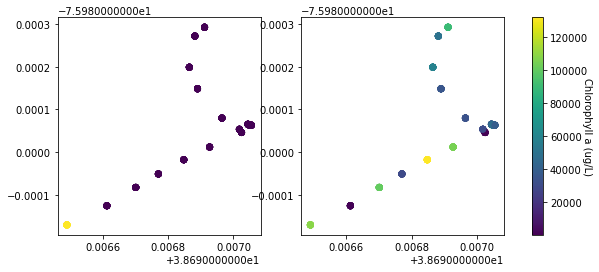

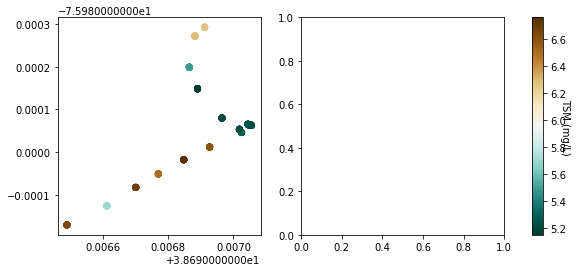

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(df)):  
    g = ax[0].scatter(df['    GPSLatitude'], df['    GPSLongitude'], c=df['chl_ocx'])
    ax[1].scatter(df['    GPSLatitude'], df['    GPSLongitude'], c=df['chl_gitelson'])
cbar = fig.colorbar(g, ax=ax)
cbar.set_label('Chlorophyll a (ug/L)', rotation=270)


fig1, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(df)):  
    g = ax[0].scatter(df['    GPSLatitude'], df['    GPSLongitude'], c=df['nechad_tsm'], cmap='BrBG_r')
cbar = fig.colorbar(g, ax=ax)
cbar.set_label('TSM (mg/L)', rotation=270)

### Georeferencing 


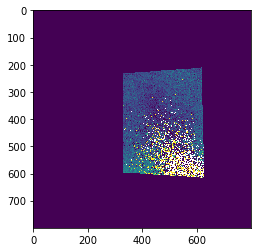

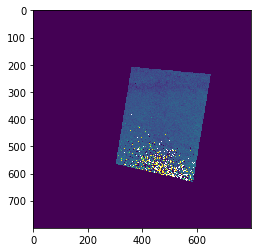

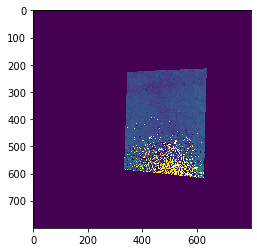

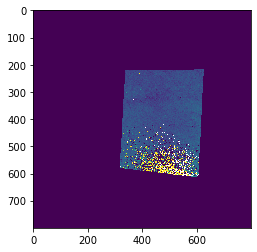

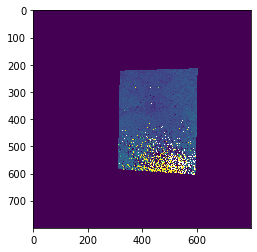

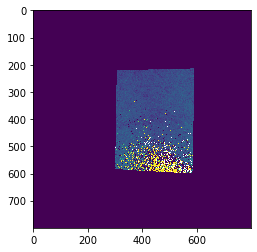

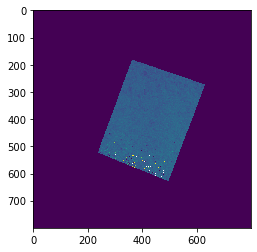

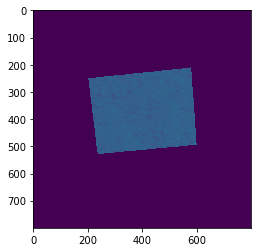

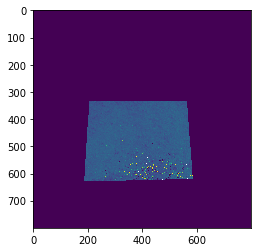

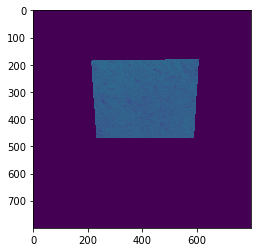

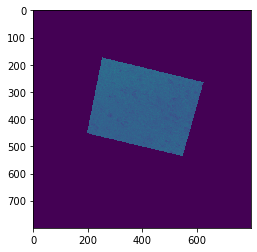

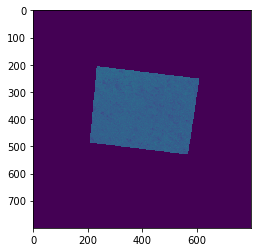

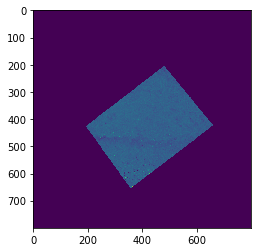

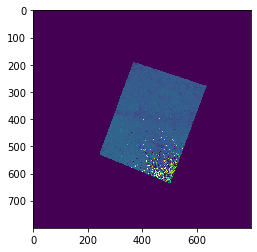

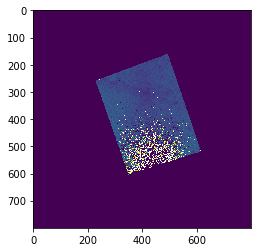

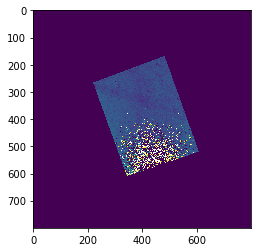

True

In [4]:
georeference(main_dir=project_path, img_dir=project_path+'/masked_rrs_hedley', output_dir_name='georeferenced_hedley_rrs', flip=True, plot=True)

#Would be nice to plot these as subplots to save room

(5, 1114, 1001)


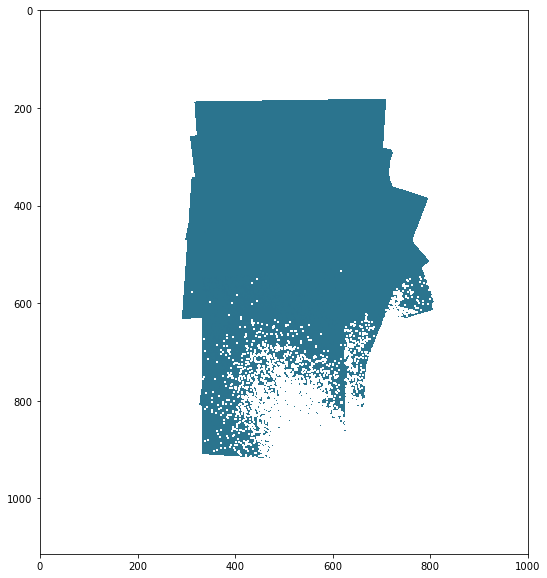

In [5]:
foo = mosaic(main_dir=project_path, img_dir = project_path+'/georeferenced_hedley_rrs', output_name='mosaic', plot=True, save=True, band_to_plot=0)
print(foo.shape)

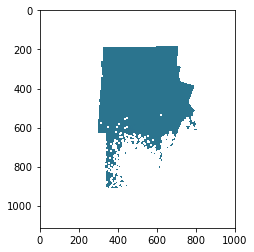

In [6]:
plt.imshow(foo[0,:,:])

#### Trying to figure out plotting points/.tifs over basemap

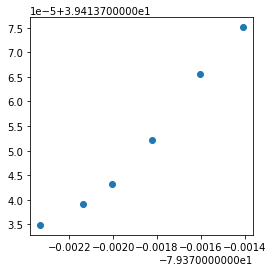

In [48]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(4, 4))

m = Basemap(projection='lcc', resolution='c',
            width=100000, height=100000, 
            lat_0=41, lon_0=-83, epsg=4326)

#m.etopo(scale=0.5, alpha=0.5)
plt.scatter(rrs_img_metadata['    GPSLongitude'], rrs_img_metadata['    GPSLatitude'])

plt.show()


In [38]:
rrs_imgs_hedley_masked, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')
rrs_img_metadata


,SourceFile,GPSDateStamp,GPSTimeStamp,GPSLatitude,GPSLatitudeRef,GPSLongitude,GPSLongitudeRef,GPSAltitude,FocalLength,ImageWidth,ImageHeight,GPSImgDirection,GPSPitch,GPSRoll,UTC-Time
filename,,,,,,,,,,,,,,,
capture_1.tif,../../../Broadford_Lake/0000SET/test/capture_1...,2022:09:09,14:31:26,39.413735,N,-79.372333,W,830.910,5.43432,1280,960,-104.755043,10.051656,-10.353182,2022-12-09 14:31:26
capture_2.tif,../../../Broadford_Lake/0000SET/test/capture_2...,2022:09:09,14:31:28,39.413739,N,-79.372136,W,831.069,5.43432,1280,960,-102.999767,5.262329,-9.868161,2022-12-09 14:31:28
capture_3.tif,../../../Broadford_Lake/0000SET/test/capture_3...,2022:09:09,14:31:29,39.413743,N,-79.372006,W,831.183,5.43432,1280,960,-102.912107,12.716979,-9.874853,2022-12-09 14:31:29
capture_4.tif,../../../Broadford_Lake/0000SET/test/capture_4...,2022:09:09,14:31:30,39.413752,N,-79.371824,W,831.106,5.43432,1280,960,-102.934161,15.560780,-11.840869,2022-12-09 14:31:30
capture_5.tif,../../../Broadford_Lake/0000SET/test/capture_5...,2022:09:09,14:31:32,39.413766,N,-79.371603,W,830.867,5.43432,1280,960,-103.214419,12.266589,-16.332490,2022-12-09 14:31:32
capture_6.tif,../../../Broadford_Lake/0000SET/test/capture_6...,2022:09:09,14:31:33,39.413775,N,-79.371407,W,830.749,5.43432,1280,960,-102.863699,10.280256,-16.620142,2022-12-09 14:31:33


In [43]:
import geopandas

# Create point geometries
geometry = geopandas.points_from_xy(rrs_img_metadata['    GPSLongitude'], rrs_img_metadata['    GPSLatitude'])
geo_df = geopandas.GeoDataFrame(
    rrs_img_metadata, geometry=geometry
)

geo_df.head()

,SourceFile,GPSDateStamp,GPSTimeStamp,GPSLatitude,GPSLatitudeRef,GPSLongitude,GPSLongitudeRef,GPSAltitude,FocalLength,ImageWidth,ImageHeight,GPSImgDirection,GPSPitch,GPSRoll,UTC-Time,geometry
filename,,,,,,,,,,,,,,,,
capture_1.tif,../../../Broadford_Lake/0000SET/test/capture_1...,2022:09:09,14:31:26,39.413735,N,-79.372333,W,830.910,5.43432,1280,960,-104.755043,10.051656,-10.353182,2022-12-09 14:31:26,POINT (-79.37233 39.41373)
capture_2.tif,../../../Broadford_Lake/0000SET/test/capture_2...,2022:09:09,14:31:28,39.413739,N,-79.372136,W,831.069,5.43432,1280,960,-102.999767,5.262329,-9.868161,2022-12-09 14:31:28,POINT (-79.37214 39.41374)
capture_3.tif,../../../Broadford_Lake/0000SET/test/capture_3...,2022:09:09,14:31:29,39.413743,N,-79.372006,W,831.183,5.43432,1280,960,-102.912107,12.716979,-9.874853,2022-12-09 14:31:29,POINT (-79.37201 39.41374)
capture_4.tif,../../../Broadford_Lake/0000SET/test/capture_4...,2022:09:09,14:31:30,39.413752,N,-79.371824,W,831.106,5.43432,1280,960,-102.934161,15.560780,-11.840869,2022-12-09 14:31:30,POINT (-79.37182 39.41375)
capture_5.tif,../../../Broadford_Lake/0000SET/test/capture_5...,2022:09:09,14:31:32,39.413766,N,-79.371603,W,830.867,5.43432,1280,960,-103.214419,12.266589,-16.332490,2022-12-09 14:31:32,POINT (-79.37160 39.41377)



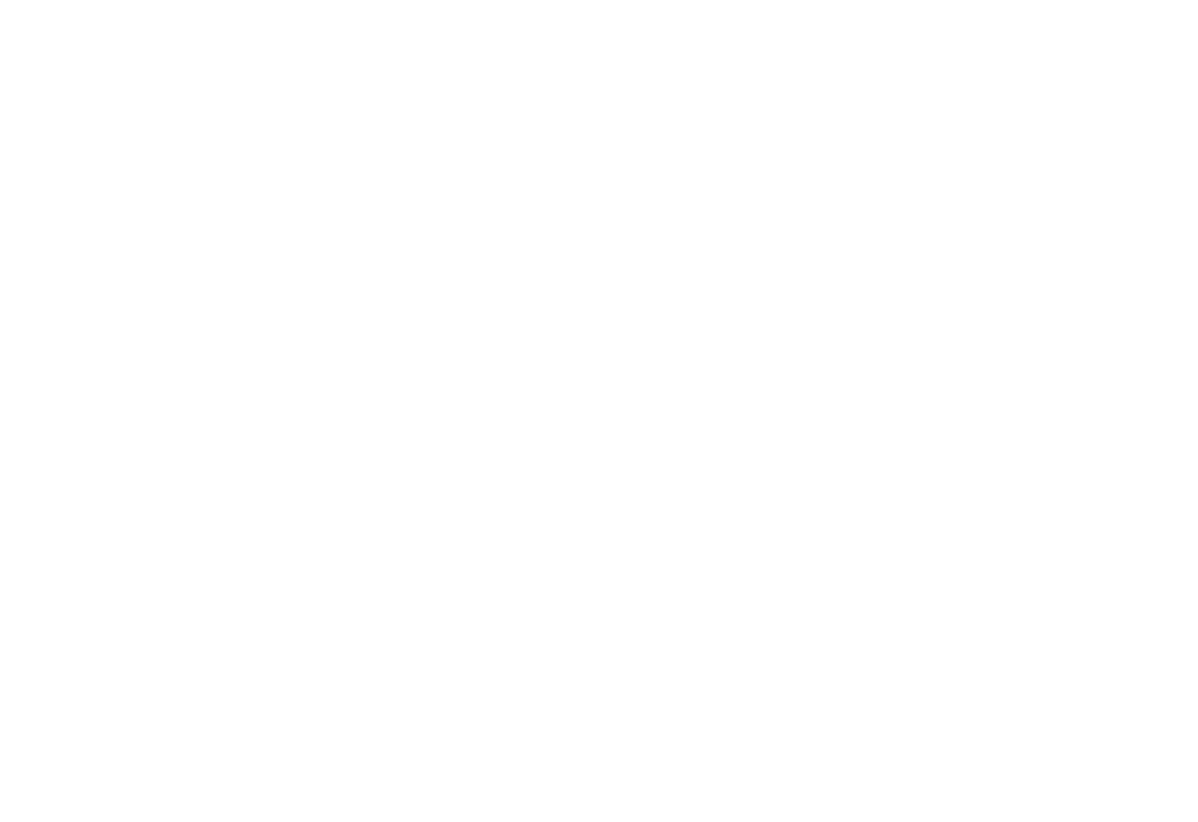

In [52]:
import folium

m = folium.Map(location=[39.4151, -79.3712], 
               tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
               attr= 'ESRI', zoom_start=15)


folium.raster_layers.ImageOverlay(
    image=foo[0,:,:],
    bounds=[[39, -79], [39, -79]],
    colormap=lambda x: (1, 0, 0, x),
).add_to(m)

m

AttributeError: 'Map' object has no attribute 'plot'

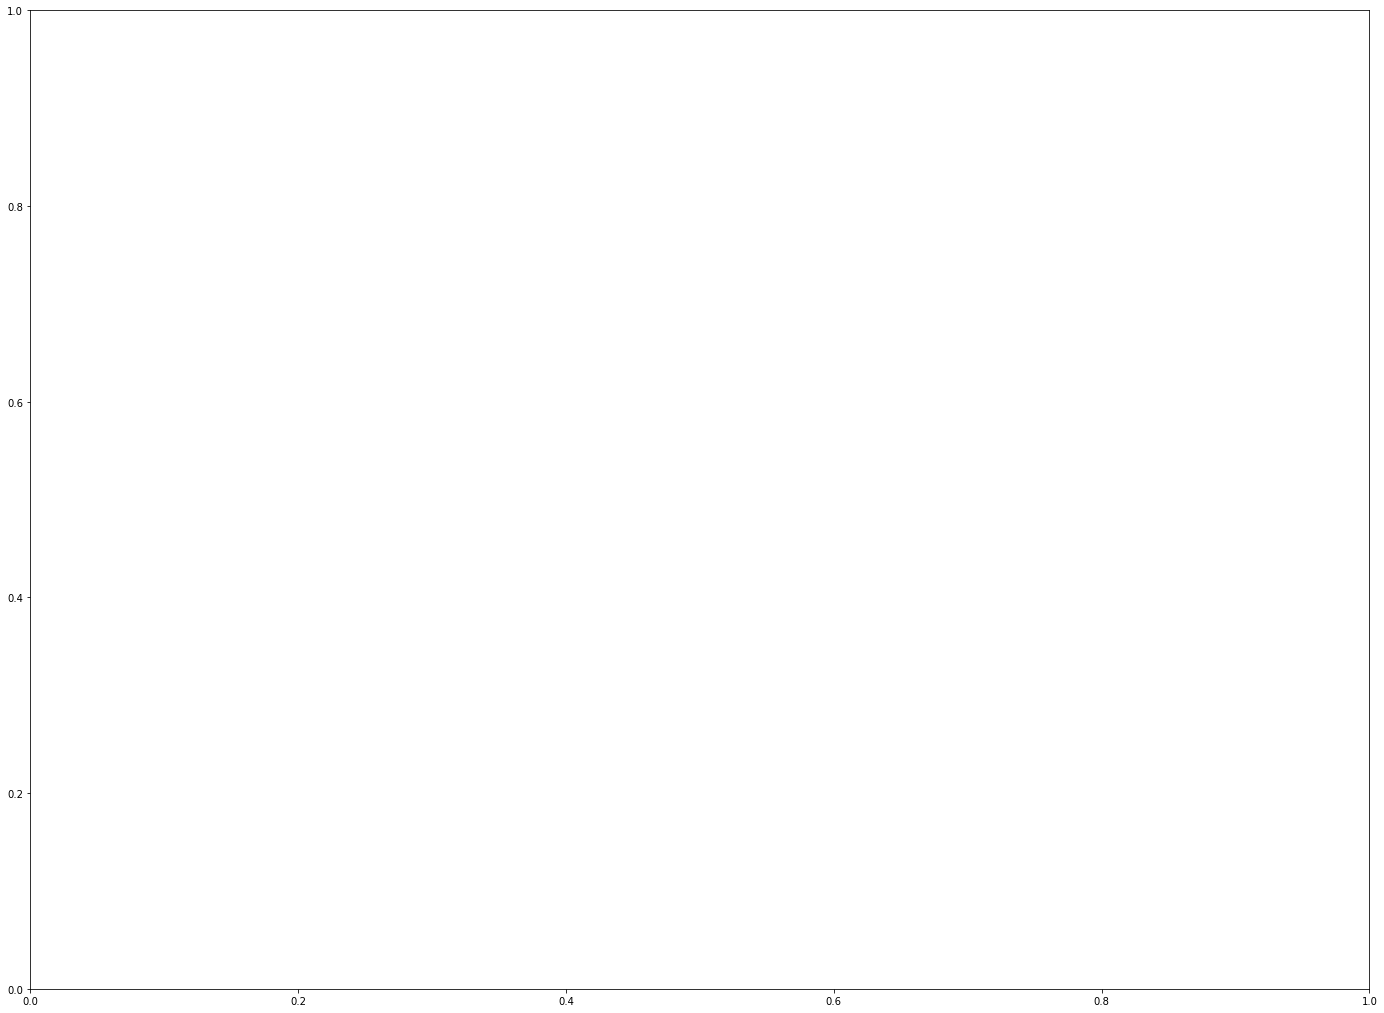

In [44]:
fig, ax = plt.subplots(figsize=(24, 18))
m.plot(ax=ax, alpha=0.4, color="grey")
geo_df.scatter(rrs_img_metadata.geometry, ax=ax, legend=True)
plt.title("Volcanoes")